In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

def de(fobj, bounds, mut=0.5, cr=0.9, popsize=20, its=1000, goal = 0):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    population = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in population])
    best_idx = np.argmin(fitness)
    best = population[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = population[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), min_b, max_b)
            cross_points = np.random.rand(dimensions) < cr
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, population[j])
            f = fobj(trial)
            if f < fitness[j]:
                fitness[j] = f
                population[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial  
        if(np.fabs(min(fitness) - goal) < 1e-6):
            break
        yield best, fitness[best_idx]

### 待优化函数 sum(x ** 2 - 10 * cos(2 * np.pi * x) + 10)

(array([-8.22258417e-06, -5.01551971e-05, -2.36172567e-06, -4.97369988e-07,
       -4.64999005e-06, -4.26668701e-05, -3.46401578e-05,  2.69410726e-05,
        6.73891146e-06,  9.74815395e-06]), 1.2890060325787545e-06)


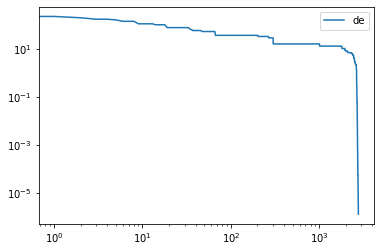

In [3]:
def fobj(x):
    return sum(x ** 2 - 10 * np.cos(2 * np.pi * x) + 10)

def fobj_test():
    it = list(de(fobj, [(-10,10)] * 10, mut = 0.5, cr = 0.9, popsize = 100, its = 10000))
    print(it[-1])
    x, f = zip(*it)
    plt.plot(f, label='de')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend() 
    plt.savefig('sum (xx - 10cos(2 pi x) + 10)优化效果')
fobj_test()

(array([-1.20164323e-09, -1.19488064e-09,  7.95417066e-11, -7.68418218e-10,
        1.04719788e-10,  1.45284673e-09, -1.15292131e-09, -4.70500083e-10,
       -1.13010756e-09,  7.68899611e-10]), 0.0)
0:01:19.207995


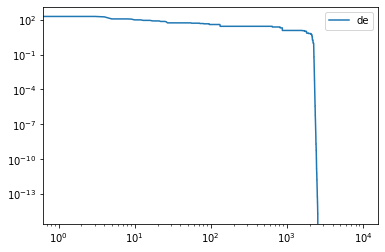

In [26]:
start = datetime.datetime.now()
fobj_test()
end = datetime.datetime.now()
print(end - start)

### 修改参数对于函数优化有什么影响

In [19]:
# for mut in (0.3, 0.5, 0.9):
#     it = list(de(fobj, [(-10, 10)] * 10, mut = mut , its=10000))    
#     x, f = zip(*it)
#     plt.plot(f, label='mut={}'.format(mut))
#     plt.xscale('log')
#     plt.yscale('log')
    
# for cr in (0.1, 0.3, 0.9):
#     it = list(de(fobj, [(-10, 10)] * 10, cr = cr , its=10000))    
#     x, f = zip(*it)
#     plt.plot(f, label='cr={}'.format(cr))
#     plt.xscale('log')
#     plt.yscale('log')
    
# for popsize1 in (20, 50, 100):
#     it = list(de(fobj, [(-10, 10)] * 10, popsize = popsize1 , its=10000))    
#     x, f = zip(*it)
#     plt.plot(f, label='popsize={}'.format(popsize1))
#     plt.xscale('log')
#     plt.yscale('log')

### 待优化函数3（cos xy）+ x + y

(array([-3.94824346, -4.        ]), -10.937409790793282)
0:00:00.221963


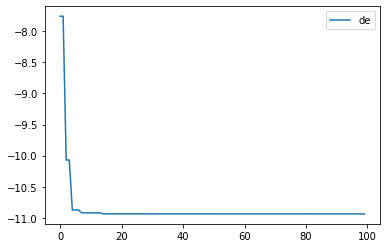

In [25]:
def fobj1(x):
    xy = 1
    for i in x:
        xy *= i
    return 3 * np.cos(xy) + sum(x)

def fobj_test1():
    it = list(de(fobj1, [(-4,4)] * 2, mut = 0.5, cr = 0.1, its = 100))
    print(it[-1])
    x, f = zip(*it)
    plt.plot(f, label='de')
    plt.legend() 
    plt.savefig('3（cos xy）+ x + y 优化效果')
start = datetime.datetime.now()
fobj_test1()
end = datetime.datetime.now()
print(end - start)

### 待优化函数 sum（100 ( Xi+1 - Xi * Xi ) **2 + ( 1 - Xi ) **2 )

IDE
只改进变异策略：
基于DE/target-to-best/1: $$V_{i,G}=X_{i,G}+F(X_{best,G}-X_{i,G})+F(X_{r1,G}-X_{r2,G})$$的改进，方法是采用一个随机个体和前面的最佳个体pbest代替当前个体Xi和最佳个体Xbest, 改进的方法描述如下:$$V_{i,G}=X_{r1,G}+F(pbest_{i,G}-X_{i,G})+F(X_{r2,G}-X_{r3,G})$$,其中r1,r2,r3为1-np中三个不同的随机整数，$pbest_i$为前面个体$X_i$的最佳个体。